In [1]:
# Importamos la libreria de Python 'fastf1'
import fastf1 as f1
import fastf1.plotting
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Cargamos el cache para guardar los datos descargados
f1.Cache.enable_cache('cache')

In [5]:
# Cargamos los datos del Gran Prix Italy 2024
sesion = f1.get_session(2024, 16, 'R')

# Mostramos sesion, nombre y fecha de la carrera
print(sesion.name)
print(sesion.date)
print(sesion.event.OfficialEventName)

Race
2024-09-01 13:00:00
FORMULA 1 PIRELLI GRAN PREMIO D’ITALIA 2024


In [6]:
sesion.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']


### Ritmo de carrera de los equipos

In [7]:
# Nos quedamos con las vueltas de cada piloto
vueltas = sesion.laps.pick_quicklaps()

In [8]:
transform_vueltas = vueltas.copy()
transform_vueltas.loc[:, "LapTime (s)"] = vueltas["LapTime"].dt.total_seconds()

# Ordenamos los equipos segun la media de tiempo, desde el mas rapido al mas lento
equipos = (
    transform_vueltas[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(equipos)

# Asociamos los equipos con colores
team_palette = {team: fastf1.plotting.get_team_color(team, session=sesion)
                for team in equipos}

req            INFO 	Using cached data for driver_info


Index(['McLaren', 'Mercedes', 'Ferrari', 'Red Bull Racing', 'Aston Martin',
       'Williams', 'Haas F1 Team', 'RB', 'Alpine', 'Kick Sauber'],
      dtype='object', name='Team')


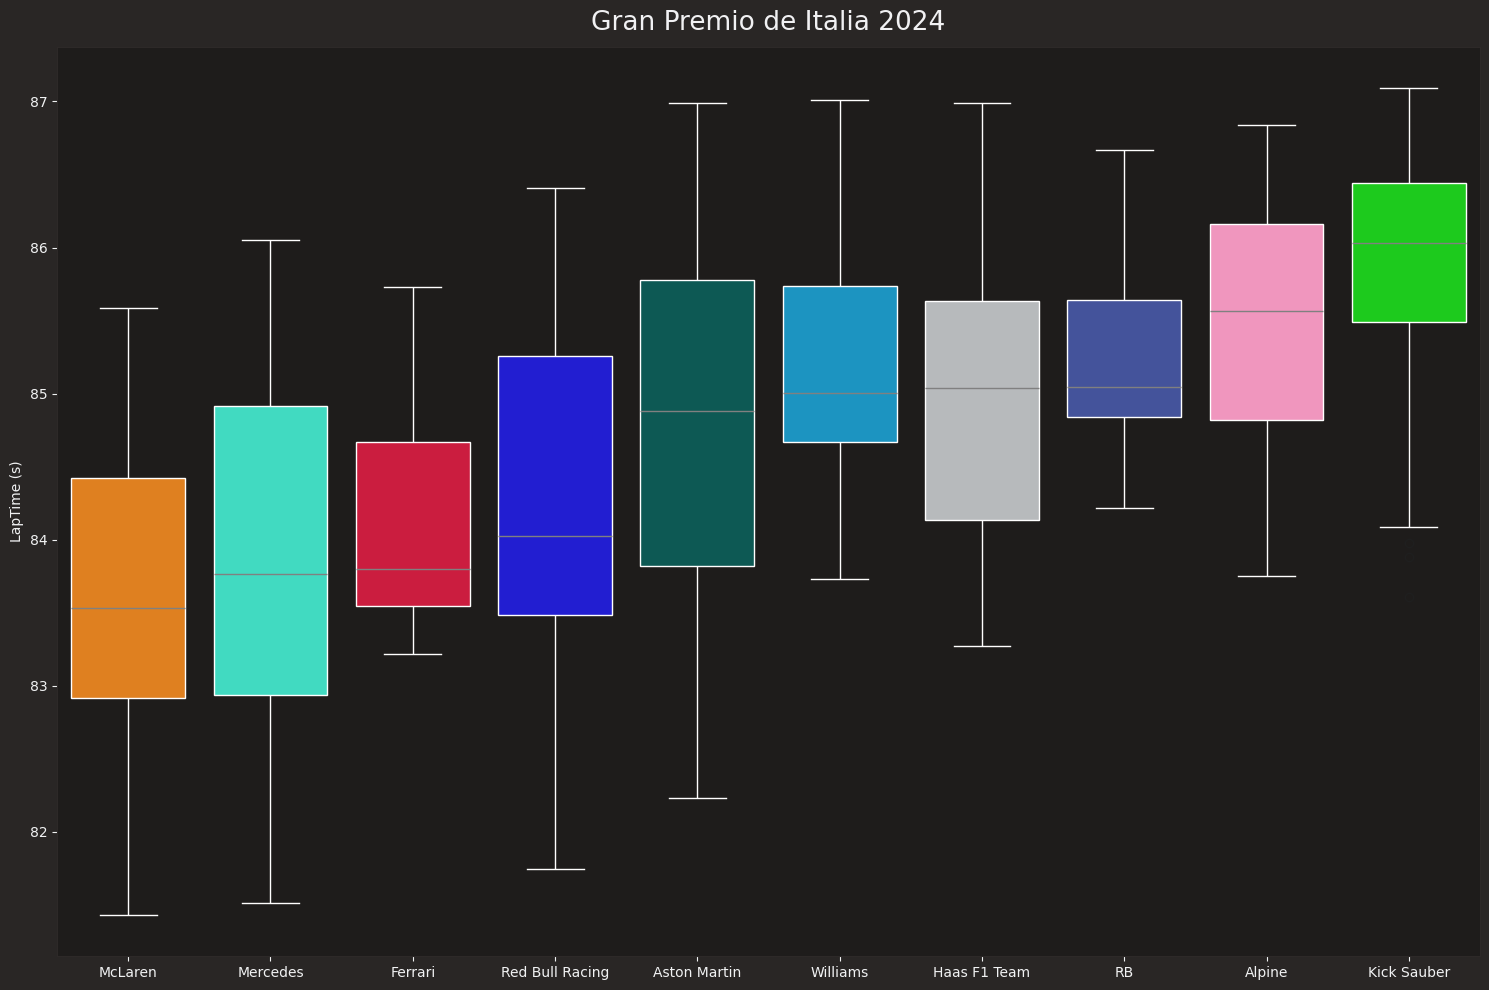

In [12]:
# Boxplots comparativos de ritmo de carrera entre los distintos equipos
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False, color_scheme='fastf1')

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transform_vueltas[["Team", "LapTime (s)"]],
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=equipos,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("Gran Premio de Italia 2024")
plt.grid(visible=False)
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

### Cambios de posiciones durante la carrera

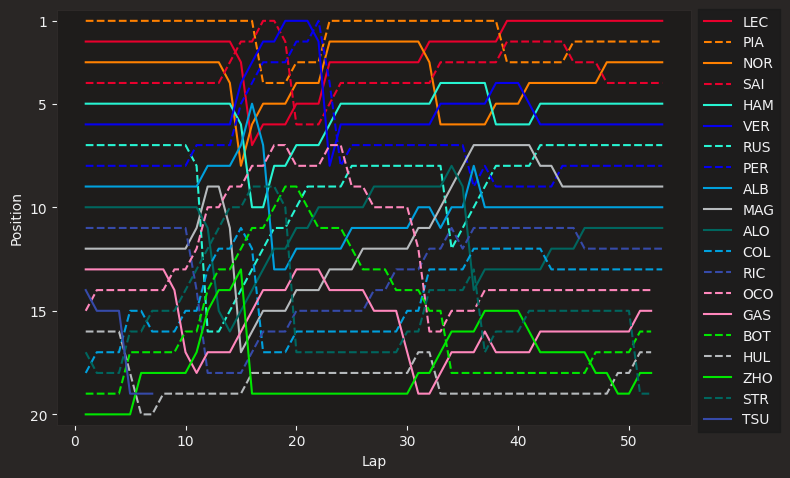

In [16]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False, color_scheme='fastf1')
fig, ax = plt.subplots(figsize=(8.0, 4.9))
for drv in sesion.drivers:
    drv_laps = sesion.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    style = fastf1.plotting.get_driver_style(identifier=abb,
                                             style=['color', 'linestyle'],
                                             session=sesion)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, **style)
    
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

### Comparación de vuelta rapida de los pilotos de Williams:
* Franco Colapinto.
* Alex Albon.

In [20]:
qualy = f1.get_session(2024, 16, 'Q')
qualy.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
req            INFO 	Data has been written to cache!
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...


In [21]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False, color_scheme='fastf1')

col_vuelta = qualy.laps.pick_driver('COL').pick_fastest()
alb_vuelta = qualy.laps.pick_driver('ALB').pick_fastest()

In [22]:
col_tel = col_vuelta.get_car_data().add_distance()
alb_tel = alb_vuelta.get_car_data().add_distance()

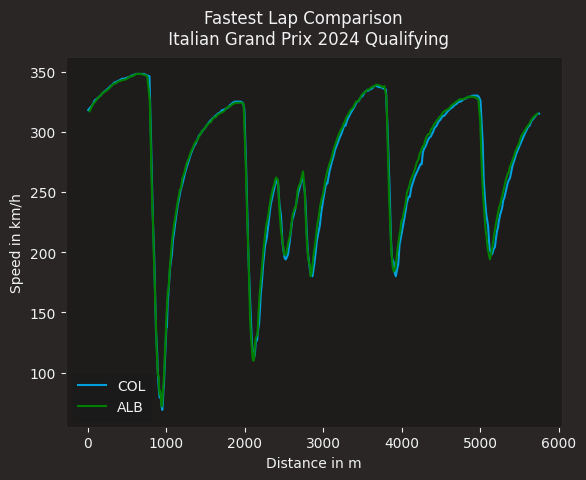

In [27]:
wil1_color = fastf1.plotting.get_team_color(col_vuelta['Team'], session=qualy)
wil2_color = 'green'

fig, ax = plt.subplots()
ax.plot(col_tel['Distance'], col_tel['Speed'], color=wil1_color, label='COL')
ax.plot(alb_tel['Distance'], alb_tel['Speed'], color=wil2_color, label='ALB')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{qualy.event['EventName']} {qualy.event.year} Qualifying")

plt.show()

In [35]:
vueltas = sesion.laps
resultados = sesion.results

In [ ]:
# Extraer tiempos de vuelta y pilotos
datos_vueltas = vueltas[['Driver', 'LapTime']]

# Mapear los nombres de los pilotos
datos_vueltas['Driver'] = datos_vueltas['Driver'].map(resultados.set_index('Abbreviation')['FullName'])

# Agregar el nombre del equipo desde los resultados
datos_vueltas['TeamName'] = datos_vueltas['Driver'].map(resultados.set_index('FullName')['TeamName'])

# Asegúrate de que LapTime es del tipo correcto
datos_vueltas['LapTime'] = datos_vueltas['LapTime']

In [61]:
# Definir la paleta de colores personalizada
colores_equipo = {
    'Ferrari': '#FF0000',          
    'McLaren': '#FF6F00',          
    'Mercedes': '#32FF7F',        
    'Red Bull Racing': '#0F1A6D',        
    'Williams': '#003FFF',        
    'Haas F1 Team': '#FFFFFF',             
    'Aston Martin': '#004F00',    
    'RB': '#00B2FF',              
    'Alpine': '#FF69B4',          
    'Kick Sauber': '#00FF00',           
}

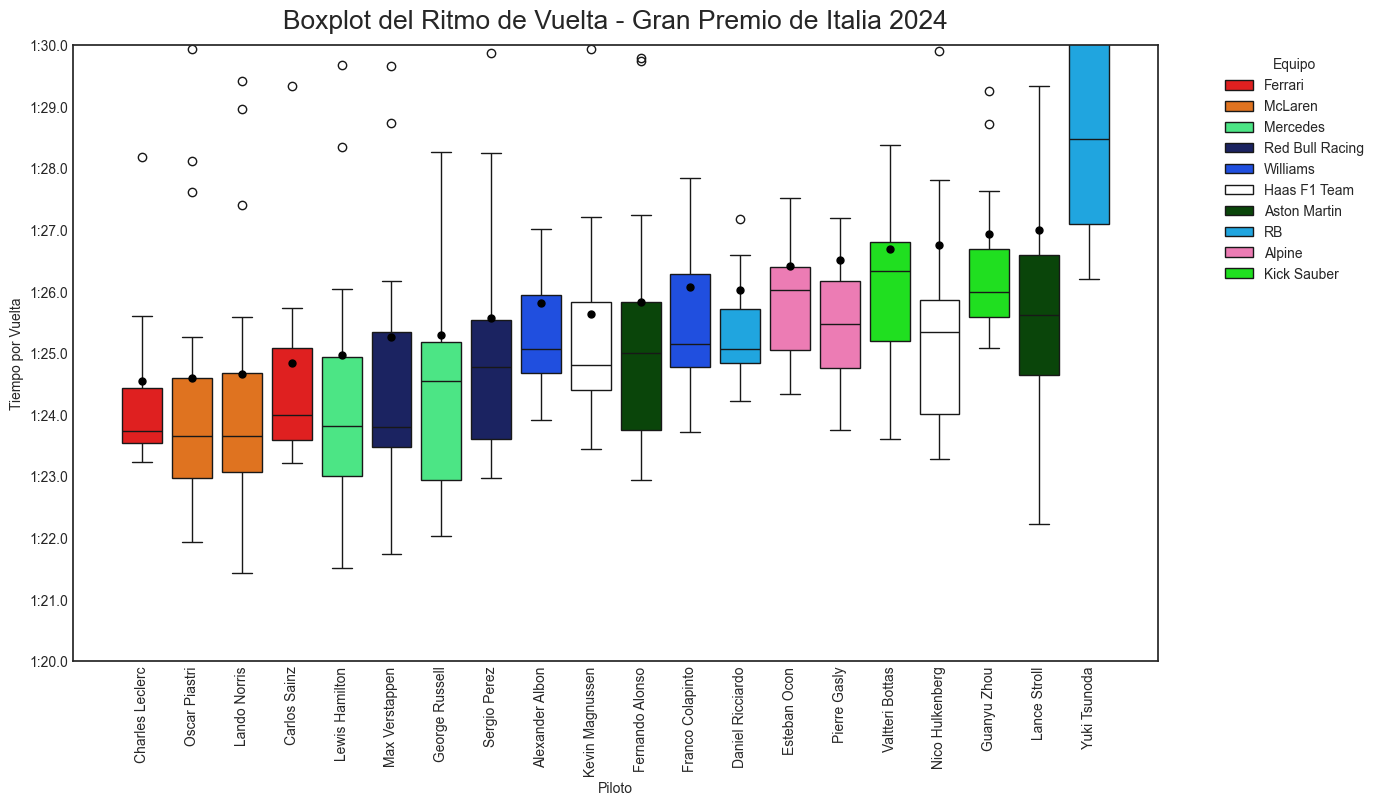

In [85]:
# Crear un boxplot del ritmo de vuelta por piloto
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme=None)
plt.style.use('seaborn-v0_8-white')  # Estilo con fondo blanco y cuadrícula

plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Driver', y='LapTime', hue='TeamName', data=datos_vueltas, palette=colores_equipo)
plt.xticks(rotation=90)  # Rotar los nombres de los pilotos para mejor visibilidad
plt.xlabel('Piloto')
plt.ylabel('Tiempo por Vuelta')
plt.title('Boxplot del Ritmo de Vuelta - Gran Premio de Italia 2024')

# Invertir el eje Y
ax.invert_yaxis()

# Limitar el rango del eje Y
plt.ylim(pd.Timedelta(minutes=1, seconds=20), pd.Timedelta(minutes=1, seconds=30))

# Calcular la media de los tiempos de vuelta para cada piloto
media_vueltas = datos_vueltas.groupby('Driver')['LapTime'].mean().reset_index()
media_vueltas.rename(columns={'LapTime': 'MediaLapTime'}, inplace=True)

# Agregar las líneas discontinuas para la media de cada piloto
for driver in media_vueltas['Driver']:
    media_time = media_vueltas[media_vueltas['Driver'] == driver]['MediaLapTime'].values[0]
    # Dibujar línea discontinua para la media con zorder alto
    ax.axhline(y=media_time, color='black', linestyle='--', linewidth=1, zorder=10)

# Agregar puntos para la media si es necesario
for driver in media_vueltas['Driver']:
    media_time = media_vueltas[media_vueltas['Driver'] == driver]['MediaLapTime'].values[0]
    ax.plot(driver, media_time, marker='o', color='black', markersize=5, zorder=20)

# Ajustar la leyenda si es necesario
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [70]:
media_vueltas

,Driver,MediaLapTime
0,Alexander Albon,0 days 00:01:25.814773584
1,Carlos Sainz,0 days 00:01:24.836754716
2,Charles Leclerc,0 days 00:01:24.542018867
3,Daniel Ricciardo,0 days 00:01:26.022245283
4,Esteban Ocon,0 days 00:01:26.411269230
5,Fernando Alonso,0 days 00:01:25.834377358
6,Franco Colapinto,0 days 00:01:26.076132075
7,George Russell,0 days 00:01:25.291358490
8,Guanyu Zhou,0 days 00:01:26.938115384
9,Kevin Magnussen,0 days 00:01:25.642056603
